# Setup and Installation

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset from kaggle to Google colab

In [2]:
#install Kaggle API
! pip install -q kaggle

In [3]:
! mkdir -p ~/.kaggle

In [4]:
#import kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
! cp kaggle.json ~/.kaggle

In [8]:
! chmod 600 /root/.kaggle/kaggle.json

In [9]:
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete            World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-10 18:25:49           2572  
gpreda/pfizer-vaccine-tweets                                  Pfizer Vaccine Tweets                               526KB  2021-01-12 10:51:10           1651  
arashnic/covid19-case-surveillance-public-use-dataset         Covid-19 Case Surveillance Public Use Dataset        46MB  2020-12-21 02:24:21           1329  
ashkhagan/women-representation-in-city-property-sanfrancisco  Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            386  
google/android-smartphones-high-accuracy-datasets   

In [10]:
#import datasets
! kaggle datasets download -d mlg-ulb/creditcardfraud

 85% 56.0M/66.0M [00:00<00:00, 28.0MB/s]
100% 66.0M/66.0M [00:01<00:00, 61.9MB/s]


In [11]:
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [13]:
dataset_1 = pd.read_csv('creditcard.csv')

In [64]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

In [65]:
dataset_1.shape

(284807, 31)

In [66]:
#check for null values
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [67]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [68]:
dataset_1['Class'].value_counts()
# 0 is valid transaction, 1 is fraud

0    284315
1       492
Name: Class, dtype: int64

In [69]:
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [70]:
#balance the dataset, take a random sample of 492 from non-fraud
non_fraud_t = non_fraud.sample(n=492)

In [71]:
non_fraud_t.shape

(492, 31)

In [72]:
dataset = fraud.append(non_fraud_t,ignore_index=True)

In [73]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,67079.0,1.135789,-0.931260,0.328136,-0.686486,-0.932760,-0.237054,-0.550486,-0.066079,-0.736522,0.501855,-0.264259,-0.387597,0.705494,-0.279409,1.122496,1.075029,0.309812,-1.679805,0.208465,0.342320,0.192490,0.235596,-0.114844,-0.249439,0.305179,-0.246204,0.010412,0.037671,138.00,0
980,36814.0,-0.381694,1.111520,1.505711,0.192450,-0.275216,-1.294159,0.703867,-0.084801,-0.370146,-0.502270,0.194254,-0.123298,-0.386997,-0.315220,0.900212,0.247102,0.225279,-0.260930,-0.289406,0.074522,-0.232349,-0.625020,0.060691,0.855093,-0.244727,0.040201,0.242947,0.102936,5.37,0
981,121562.0,-0.203320,1.123231,1.211610,2.790844,0.022093,1.122188,0.667112,0.131880,-0.829120,0.851006,-1.664741,-0.557703,0.185231,-0.536126,-0.958194,1.314230,-1.145794,0.208690,-1.914020,-0.288151,0.234689,0.672567,-0.007462,0.639228,-0.431504,-0.096427,-0.154547,-0.010359,107.28,0
982,65891.0,1.457234,-0.921989,0.873491,-1.261251,-1.775696,-1.075276,-0.966579,-0.274558,-1.957986,1.370508,0.084772,-0.049917,1.760734,-0.614030,0.590387,-0.343111,0.471502,-0.346640,-0.375280,-0.228277,-0.325356,-0.550454,0.193679,0.689120,0.126733,-0.435597,0.049712,0.037906,25.00,0


In [74]:
dataset['Class'].value_counts()
# Hence balanced

1    492
0    492
Name: Class, dtype: int64

In [75]:
#matrix of features
x =  dataset.drop(labels=['Class'],axis=1)

In [76]:
#dependent variable
y = dataset['Class']

In [77]:
x.shape, y.shape

((984, 30), (984,))

In [78]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [79]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [80]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [81]:
x_train

array([[ 1.22294655,  0.39893064, -0.24321998, ..., -0.00825722,
        -0.03083714, -0.47085762],
       [-0.82282709,  0.52481341, -0.10494527, ...,  0.47066273,
         0.60034421, -0.47651129],
       [-0.85974524,  0.20472775,  0.0904856 , ...,  0.30869247,
         0.45145177, -0.47539909],
       ...,
       [ 0.49278284,  0.59337499, -0.34663434, ...,  0.12917435,
         0.59187843, -0.47539909],
       [ 1.13999516,  0.88175168, -0.74219197, ..., -0.19470224,
        -0.28251028, -0.42442343],
       [ 1.17914006,  0.79796576, -0.74279051, ..., -0.11930335,
        -0.17436834, -0.02125232]])

In [82]:
y_train = y_train.to_numpy()
y_test= y_test.to_numpy()

In [83]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [84]:
#reshape dataset to 2d
x_train  = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [85]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Building a Model

In [86]:
#define model object
model = tf.keras.models.Sequential()

In [87]:
#Add first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same',activation='relu', input_shape=(30, 1)))

#batch normalization
model.add(tf.keras.layers.BatchNormalization())

#maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [88]:
#Add second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same',activation='relu', input_shape=(30, 1)))

#batch normalization
model.add(tf.keras.layers.BatchNormalization())

#maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [89]:
#flatten layer
model.add(tf.keras.layers.Flatten())

In [90]:
#first Dense layer
model.add(tf.keras.layers.Dense(units=64,activation='relu'))

#dropout layer
model.add(tf.keras.layers.Dropout(0.3))

#second Dense layer // Output layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 30, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 15, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 64)            256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 7, 64)            

In [92]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

In [93]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

# Training the model

In [94]:
history = model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
25/25 [==============================] - 1s 16ms/step - loss: 0.8892 - accuracy: 0.5472 - val_loss: 0.6567 - val_accuracy: 0.7716
Epoch 2/25
25/25 [==============================] - 0s 8ms/step - loss: 0.7912 - accuracy: 0.5995 - val_loss: 0.6247 - val_accuracy: 0.7919
Epoch 3/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6822 - accuracy: 0.6621 - val_loss: 0.5996 - val_accuracy: 0.7411
Epoch 4/25
25/25 [==============================] - 0s 7ms/step - loss: 0.5531 - accuracy: 0.7277 - val_loss: 0.5752 - val_accuracy: 0.7360
Epoch 5/25
25/25 [==============================] - 0s 8ms/step - loss: 0.4988 - accuracy: 0.7359 - val_loss: 0.5499 - val_accuracy: 0.7360
Epoch 6/25
25/25 [==============================] - 0s 7ms/step - loss: 0.4556 - accuracy: 0.7868 - val_loss: 0.5228 - val_accuracy: 0.7513
Epoch 7/25
25/25 [==============================] - 0s 8ms/step - loss: 0.4384 - accuracy: 0.8068 - val_loss: 0.4930 - val_accuracy: 0.7766
Epoch 8/25
25/25 [=

In [95]:
#model predictions
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [96]:
y_pred[12][0], y_test[12]

(1, 1)

In [97]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

acc_cm = accuracy_score(y_test,y_pred)
print('accuracy score is {}'.format(acc_cm))

[[105   1]
 [ 15  76]]
accuracy score is 0.9187817258883249


# Learning Curve

In [98]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

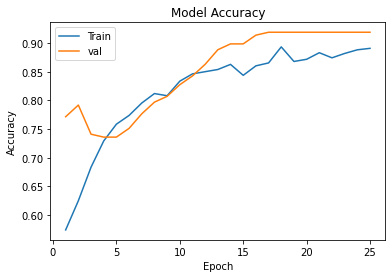

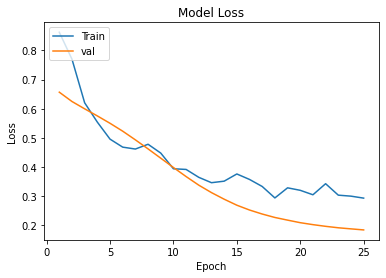

In [99]:
learning_curve(history, 25)